# Predicción precio Airbnb

## 1. Importar librerias

In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## 2. Cargar el Data Set

In [114]:
data = pd.read_csv('airbnb-listings-extract.csv',sep=';', decimal='.')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


## 3. Limpieza del Data Set

El objetivo es Madrid, revisando el csv se aprecia que en la columna 'City' hay errores con el nombre Madrid. Sin embargo en la columna 'Market' aparece la ciudad y aparentemente parece que no hay errores. Se analiza la columna para comprobar que corresponden todas las filas a 'Madrid'.

In [ ]:
unique_market = data['Market'].unique()
print("Valores únicos en la columna 'Market':", unique_market)

Valores únicos en la columna 'Market': ['Austin' 'Barcelona' 'Amsterdam' 'Antwerp' 'Paris' 'Mallorca Island'
 'Madrid' nan 'Other (International)' 'Los Angeles' 'London' 'New York'
 'Dublin' 'Edinburgh' 'Rome' 'Brussels' 'D.C.' 'Athens' 'Manchester'
 'Copenhagen' 'Sydney' 'Seattle' 'Berlin' 'Vienna' 'Montreal' 'Boston'
 'Venice' 'Melbourne' 'Chicago' 'Geneva' 'Toronto' 'Denver' 'Vancouver'
 'San Francisco' 'East Bay, CA' 'Hong Kong' 'Malibu' 'New Orleans'
 'San Diego' 'Santiago' 'Toledo' 'Byron Bay' 'Nashville' 'Deauville']


Efectivamente aparece correctamente la ciudad por lo que se crea un dataframe nuevo unicamente con la información de Madrid extraida de la columna 'Market'.

In [116]:
df_madrid= data.loc[data['Market'] == 'Madrid']
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 40 to 14757
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              13274 non-null  int64  
 1   Listing Url                     13274 non-null  object 
 2   Scrape ID                       13274 non-null  int64  
 3   Last Scraped                    13274 non-null  object 
 4   Name                            13274 non-null  object 
 5   Summary                         12785 non-null  object 
 6   Space                           9645 non-null   object 
 7   Description                     13268 non-null  object 
 8   Experiences Offered             13274 non-null  object 
 9   Neighborhood Overview           8285 non-null   object 
 10  Notes                           4996 non-null   object 
 11  Transit                         8211 non-null   object 
 12  Access                         

Se revisan las columnas que hay en df_madrid

In [117]:
column_names = df_madrid.columns
print(column_names)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [118]:
df_madrid.describe(include='all')

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
count,1.327400e+04,13274,1.327400e+04,13274,13274,12785,9645,13268,13274,8285,...,10379.000000,10362.000000,10362.000000,249,0,13274,13274.000000,10512.000000,13274,13274
unique,NaN,13274,NaN,2,12875,11998,9010,12820,1,7167,...,NaN,NaN,NaN,241,0,5,NaN,NaN,13274,62
top,NaN,https://www.airbnb.com/rooms/6478626,NaN,2017-04-08,Apartamento en el centro de Madrid,"Unique apartment in vibrant neighborhoods, car...",Tenga en cuenta que nuestra propuesta es simpl...,Es un piso con 6 habitaciones de las que 5 ha...,none,Se trata de una de las zonas más emblemáticas ...,...,NaN,NaN,NaN,VT1046,NaN,strict,NaN,NaN,"40.4069528479,-3.6708944906","Host Has Profile Pic,Host Identity Verified,Is..."
freq,NaN,1,NaN,13273,12,22,19,19,13274,32,...,NaN,NaN,NaN,3,NaN,5007,NaN,NaN,1,2370
mean,1.042430e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.644571,9.542752,9.212025,NaN,NaN,NaN,7.559816,1.924306,NaN,NaN
std,5.524515e+06,NaN,7.996453e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.758063,0.766767,0.954580,NaN,NaN,NaN,19.592132,1.889577,NaN,NaN
min,1.862800e+04,NaN,2.017032e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.000000,0.020000,NaN,NaN
25%,5.831642e+06,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,9.000000,9.000000,NaN,NaN,NaN,1.000000,0.480000,NaN,NaN
50%,1.155029e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,10.000000,9.000000,NaN,NaN,NaN,2.000000,1.270000,NaN,NaN
75%,1.539478e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,10.000000,10.000000,NaN,NaN,NaN,4.000000,2.880000,NaN,NaN


Se eliminan de df_madrid aquellas columnas que no son relevantes para nuestro estudio como datos repetidos, urls, imagenes, información del propietario, información repetida sobre el precio o la geolocalización. El en caso del barrio hay tres columnas, nos quedamos con la que mas datos aporta.

In [119]:
df_madrid = df_madrid.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street','Neighbourhood', 'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Bed Type', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features'], axis=1)
df_madrid.head().T

,40,41,42,43,44
Neighbourhood Group Cleansed,Retiro,Salamanca,Salamanca,Salamanca,Salamanca
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,2,2,3,1,6
Bathrooms,2.0,1.0,1.0,1.0,1.0
Bedrooms,1.0,0.0,0.0,1.0,2.0
Beds,1.0,1.0,2.0,1.0,3.0
Amenities,"TV,Wireless Internet,Kitchen,Heating,Essential...","TV,Internet,Wireless Internet,Air conditioning...","TV,Internet,Wireless Internet,Air conditioning...","Internet,Wireless Internet,Kitchen,Doorman,Ele...","TV,Internet,Wireless Internet,Air conditioning..."
Square Feet,NaN,NaN,NaN,NaN,NaN
Price,28.0,58.0,70.0,26.0,70.0


Se revisa en data frame con las columnas seleccionadasm tanto el tipo como el porcentaje de NA.

In [120]:
df_madrid.dtypes

Neighbourhood Group Cleansed     object
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Amenities                        object
Square Feet                     float64
Price                           float64
Cleaning Fee                    float64
Availability 90                   int64
Review Scores Rating            float64
dtype: object

Se convierte la columna 'Square Feet' a 'Square Meters' y se elimina la columna 'Square Feet'.

In [121]:
df_madrid['Square Meters'] = df_madrid['Square Feet'] * 0.092903
df_madrid = df_madrid.drop(columns=['Square Feet'])
column_names = df_madrid.columns
df_madrid.head().T

,40,41,42,43,44
Neighbourhood Group Cleansed,Retiro,Salamanca,Salamanca,Salamanca,Salamanca
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,2,2,3,1,6
Bathrooms,2.0,1.0,1.0,1.0,1.0
Bedrooms,1.0,0.0,0.0,1.0,2.0
Beds,1.0,1.0,2.0,1.0,3.0
Amenities,"TV,Wireless Internet,Kitchen,Heating,Essential...","TV,Internet,Wireless Internet,Air conditioning...","TV,Internet,Wireless Internet,Air conditioning...","Internet,Wireless Internet,Kitchen,Doorman,Ele...","TV,Internet,Wireless Internet,Air conditioning..."
Price,28.0,58.0,70.0,26.0,70.0
Cleaning Fee,NaN,NaN,30.0,NaN,20.0


In [122]:
na_df_madrid = (df_madrid.isnull().sum() / len(df_madrid)) * 100
na_df_madrid = na_df_madrid.apply(lambda x: '{:.2f}%'.format(x))
na_df_madrid

Neighbourhood Group Cleansed     0.01%
Property Type                    0.00%
Room Type                        0.00%
Accommodates                     0.00%
Bathrooms                        0.38%
Bedrooms                         0.17%
Beds                             0.37%
Amenities                        1.22%
Price                            0.07%
Cleaning Fee                    41.00%
Availability 90                  0.00%
Review Scores Rating            21.72%
Square Meters                   96.07%
dtype: object

Se aprecia que el porcentaje de NA en 'Neighbourhood Group Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Price' es pequeño, por lo que eliminamos aquellos que lo contienen. Se renombra la columna 'Neighbourhood Group Cleansed'.

In [123]:
df_madrid = df_madrid.dropna(subset=['Neighbourhood Group Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating'])
df_madrid = df_madrid.rename(columns={'Neighbourhood Group Cleansed': 'Neighbourhood'})

na_df_madrid = (df_madrid.isnull().sum() / len(df_madrid)) * 100
na_df_madrid = na_df_madrid.apply(lambda x: '{:.2f}%'.format(x))
na_df_madrid

Neighbourhood            0.00%
Property Type            0.00%
Room Type                0.00%
Accommodates             0.00%
Bathrooms                0.00%
Bedrooms                 0.00%
Beds                     0.00%
Amenities                0.32%
Price                    0.00%
Cleaning Fee            37.04%
Availability 90          0.00%
Review Scores Rating     0.00%
Square Meters           95.39%
dtype: object

In [124]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10336 entries, 40 to 14757
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Neighbourhood         10336 non-null  object 
 1   Property Type         10336 non-null  object 
 2   Room Type             10336 non-null  object 
 3   Accommodates          10336 non-null  int64  
 4   Bathrooms             10336 non-null  float64
 5   Bedrooms              10336 non-null  float64
 6   Beds                  10336 non-null  float64
 7   Amenities             10303 non-null  object 
 8   Price                 10336 non-null  float64
 9   Cleaning Fee          6508 non-null   float64
 10  Availability 90       10336 non-null  int64  
 11  Review Scores Rating  10336 non-null  float64
 12  Square Meters         477 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.1+ MB


Transformamos 'Neighbourhood', 'Property Type'y 'Room Type' a números enteros y se comprueba.

In [125]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
columns_to_encode = ['Neighbourhood', 'Property Type', 'Room Type']
df_madrid[columns_to_encode] = encoder.fit_transform(df_madrid[columns_to_encode])


df_madrid.dtypes

Neighbourhood           float64
Property Type           float64
Room Type               float64
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Amenities                object
Price                   float64
Cleaning Fee            float64
Availability 90           int64
Review Scores Rating    float64
Square Meters           float64
dtype: object

La columna 'Amenities' contiene información relevante para la predicción del precio. Se crea una columna con la cantidad de 'Amenities' que tiene un piso y se elimina la columna original. Como hay valores nulos, los convertimos en una cadena vacia antes de hacer el conteo. 

In [126]:
df_madrid['Amenities'] = df_madrid['Amenities'].fillna('')
df_madrid['Amenities_Count'] = df_madrid['Amenities'].str.split(',').apply(len)
df_madrid = df_madrid.drop(['Amenities'], axis=1)

df_madrid.head().T

,40,41,42,43,45
Neighbourhood,13.0,14.0,14.0,14.0,14.0
Property Type,0.0,0.0,0.0,0.0,14.0
Room Type,1.0,0.0,0.0,1.0,0.0
Accommodates,2.0,2.0,3.0,1.0,4.0
Bathrooms,2.0,1.0,1.0,1.0,1.0
Bedrooms,1.0,0.0,0.0,1.0,1.0
Beds,1.0,1.0,2.0,1.0,1.0
Price,28.0,58.0,70.0,26.0,108.0
Cleaning Fee,NaN,NaN,30.0,NaN,30.0
Availability 90,12.0,9.0,32.0,59.0,50.0


Se revisa la cantidad de valores NA que contienen en cada columna.

In [127]:
na_df_madrid = (df_madrid.isnull().sum() / len(df_madrid)) * 100
na_df_madrid = na_df_madrid.apply(lambda x: '{:.2f}%'.format(x))
na_df_madrid

Neighbourhood            0.00%
Property Type            0.00%
Room Type                0.00%
Accommodates             0.00%
Bathrooms                0.00%
Bedrooms                 0.00%
Beds                     0.00%
Price                    0.00%
Cleaning Fee            37.04%
Availability 90          0.00%
Review Scores Rating     0.00%
Square Meters           95.39%
Amenities_Count          0.00%
dtype: object

En la variable 'Cleaning Fee' calculamos la media con respecto al precio para rellenar los NA.

In [128]:
cleaning_fee_mean = df_madrid['Cleaning Fee'].mean()
df_madrid['Cleaning Fee'].fillna(cleaning_fee_mean, inplace=True)

'Square Meters' tiene un porcentaje muy alto de valores NA. Se considera que es una variable importante a tener en cuenta a la hora de predecir el precio, pero al tener mas de un 50% de NA no se utilizara. 

In [129]:
df_madrid = df_madrid.drop(columns=['Square Meters'])

In [130]:
na_df_madrid = (df_madrid.isnull().sum() / len(df_madrid)) * 100
na_df_madrid = na_df_madrid.apply(lambda x: '{:.2f}%'.format(x))
na_df_madrid

Neighbourhood           0.00%
Property Type           0.00%
Room Type               0.00%
Accommodates            0.00%
Bathrooms               0.00%
Bedrooms                0.00%
Beds                    0.00%
Price                   0.00%
Cleaning Fee            0.00%
Availability 90         0.00%
Review Scores Rating    0.00%
Amenities_Count         0.00%
dtype: object

La columna 'Price' se coloca al comienzo del dataframe.

In [131]:
columnas = df_madrid.columns.tolist()
columnas.insert(0, columnas.pop(columnas.index('Price')))
df_madrid = df_madrid[columnas]
print(df_madrid.columns)
df_madrid.dtypes

Index(['Price', 'Neighbourhood', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Availability 90',
       'Review Scores Rating', 'Amenities_Count'],
      dtype='object')


Price                   float64
Neighbourhood           float64
Property Type           float64
Room Type               float64
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Cleaning Fee            float64
Availability 90           int64
Review Scores Rating    float64
Amenities_Count           int64
dtype: object

float64 se convierte a int64

In [132]:
df_madrid['Neighbourhood'] = df_madrid['Neighbourhood'].round().astype(int)
df_madrid['Property Type'] = df_madrid['Property Type'].round().astype(int)
df_madrid['Room Type'] = df_madrid['Room Type'].round().astype(int)
df_madrid['Bathrooms'] = df_madrid['Beds'].round().astype(int)
df_madrid['Bedrooms'] = df_madrid['Beds'].round().astype(int)
df_madrid['Beds'] = df_madrid['Beds'].round().astype(int)
df_madrid['Cleaning Fee'] = df_madrid['Cleaning Fee'].round().astype(int)
df_madrid['Availability 90'] = df_madrid['Availability 90'].round().astype(int)
df_madrid['Review Scores Rating'] = df_madrid['Review Scores Rating'].round().astype(int)
df_madrid.dtypes

Price                   float64
Neighbourhood             int64
Property Type             int64
Room Type                 int64
Accommodates              int64
Bathrooms                 int64
Bedrooms                  int64
Beds                      int64
Cleaning Fee              int64
Availability 90           int64
Review Scores Rating      int64
Amenities_Count           int64
dtype: object

## 4. Exploración de datos (EDA)

In [133]:
df_madrid.describe(include='all')

,Price,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Availability 90,Review Scores Rating,Amenities_Count
count,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000
mean,64.647252,5.547891,1.643382,0.373742,3.320627,2.046149,2.046149,2.046149,28.306018,39.433340,91.628193,14.785991
std,49.472249,4.668895,4.070063,0.509345,1.990725,1.529361,1.529361,1.529361,17.077033,27.202038,8.981636,4.579995
min,9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,20.000000,1.000000
25%,33.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,20.000000,16.000000,89.000000,12.000000
50%,55.000000,3.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.000000,28.000000,38.000000,94.000000,15.000000
75%,80.000000,8.000000,0.000000,1.000000,4.000000,2.000000,2.000000,2.000000,30.000000,61.000000,98.000000,18.000000
max,800.000000,20.000000,19.000000,2.000000,16.000000,16.000000,16.000000,16.000000,350.000000,90.000000,100.000000,34.000000


In [134]:
df_madrid['Neighbourhood'].value_counts()

3     5560
5      688
14     658
0      616
13     347
16     335
10     302
9      276
4      258
2      246
6      217
12     162
8      142
17     111
7       97
15      92
1       63
11      59
20      55
19      36
18      16
Name: Neighbourhood, dtype: int64

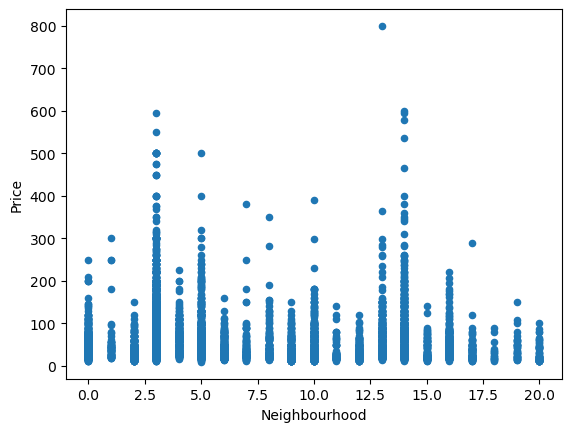

In [135]:
df_madrid.plot(kind = 'scatter',x='Neighbourhood',y = 'Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

In [136]:
df_madrid['Property Type'].value_counts()

0     8589
12     685
1      279
7      252
13     241
14     184
8       31
10      28
6       18
15       8
11       5
18       4
19       3
9        3
16       1
17       1
3        1
4        1
2        1
5        1
Name: Property Type, dtype: int64

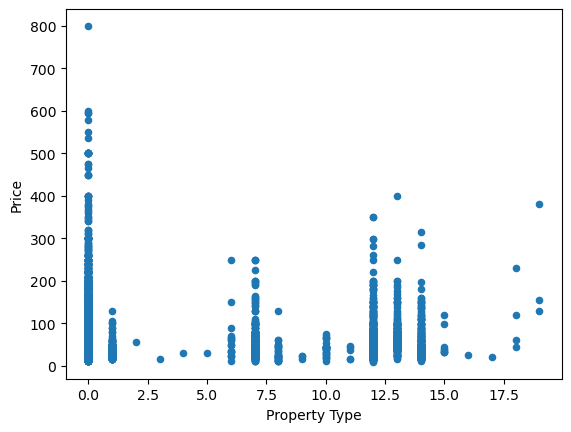

In [137]:
df_madrid.plot(kind = 'scatter',x='Property Type',y = 'Price')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

In [138]:
df_madrid['Room Type'].value_counts()

0    6604
1    3601
2     131
Name: Room Type, dtype: int64

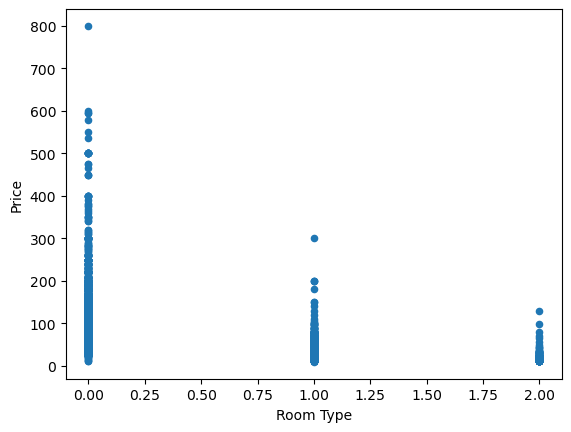

In [139]:
df_madrid.plot(kind = 'scatter',x='Room Type',y = 'Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [140]:
df_madrid['Accommodates'].value_counts()

2     3686
4     2488
1     1167
3     1052
6      872
5      535
8      205
7      133
10      76
9       43
12      29
16      23
11      14
14       9
13       3
15       1
Name: Accommodates, dtype: int64

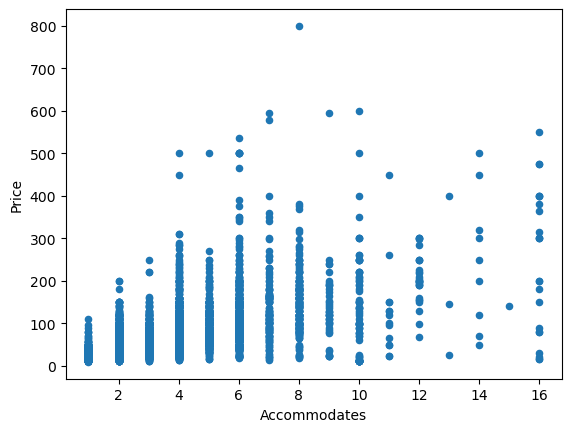

In [141]:
df_madrid.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

In [142]:
df_madrid['Bathrooms'].value_counts()

1     4874
2     2946
3     1224
4      674
5      275
6      147
7       59
8       54
10      31
9       23
16       9
12       8
11       4
14       4
15       2
13       2
Name: Bathrooms, dtype: int64

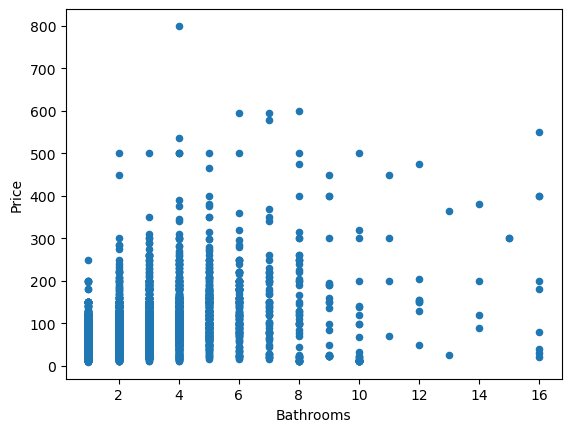

In [143]:
df_madrid.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [144]:
df_madrid['Bedrooms'].value_counts()

1     4874
2     2946
3     1224
4      674
5      275
6      147
7       59
8       54
10      31
9       23
16       9
12       8
11       4
14       4
15       2
13       2
Name: Bedrooms, dtype: int64

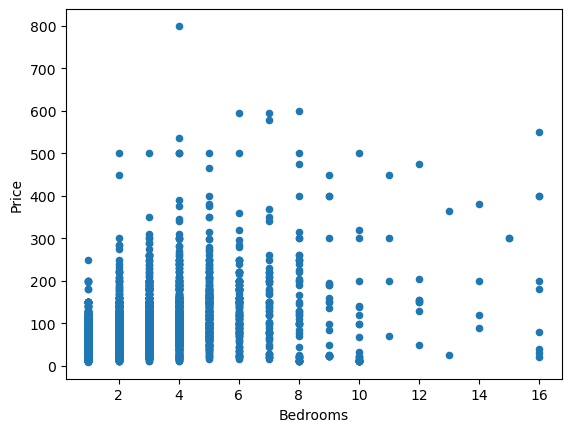

In [145]:
df_madrid.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [146]:
df_madrid['Beds'].value_counts()

1     4874
2     2946
3     1224
4      674
5      275
6      147
7       59
8       54
10      31
9       23
16       9
12       8
11       4
14       4
15       2
13       2
Name: Beds, dtype: int64

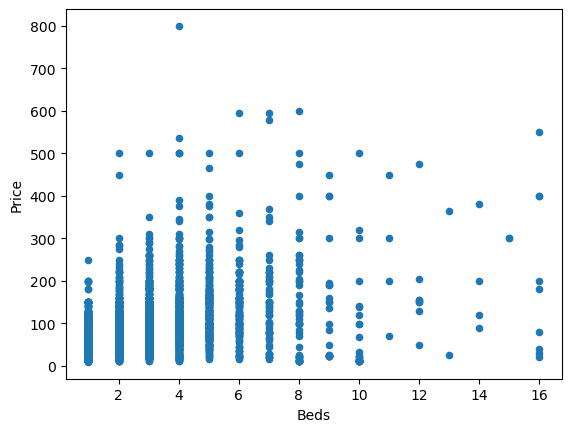

In [147]:
df_madrid.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

In [148]:
df_madrid['Cleaning Fee'].value_counts()

28    3841
30    1051
20     993
10     656
25     611
      ... 
89       1
62       1
44       1
88       1
94       1
Name: Cleaning Fee, Length: 82, dtype: int64

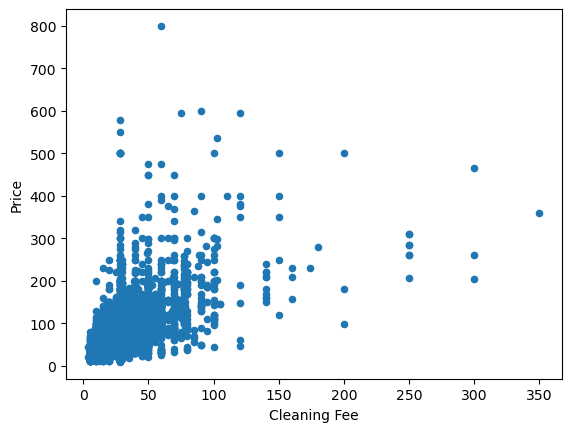

In [149]:
df_madrid.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('Price')
plt.show()

In [150]:
df_madrid['Availability 90'].value_counts()

0     1098
90     288
36     180
6      157
35     155
      ... 
87      58
79      56
85      53
83      52
86      50
Name: Availability 90, Length: 91, dtype: int64

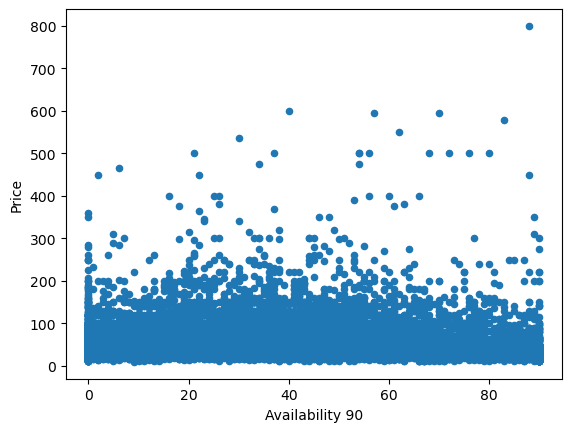

In [151]:
df_madrid.plot(kind = 'scatter',x='Availability 90',y = 'Price')
plt.xlabel('Availability 90')
plt.ylabel('Price')
plt.show()

In [152]:
df_madrid['Review Scores Rating'].value_counts()

100    1835
96      711
93      708
95      676
97      625
98      580
94      577
90      575
80      547
92      461
91      423
87      323
89      319
88      305
99      268
85      199
84      153
83      148
86      147
60      102
82       89
81       58
70       55
73       53
78       50
77       46
75       45
76       32
79       32
40       29
67       25
20       19
72       19
74       17
65       13
71       13
50       12
68       10
53        5
69        5
64        5
47        4
66        4
57        2
30        2
63        2
49        1
26        1
52        1
58        1
55        1
62        1
56        1
33        1
Name: Review Scores Rating, dtype: int64

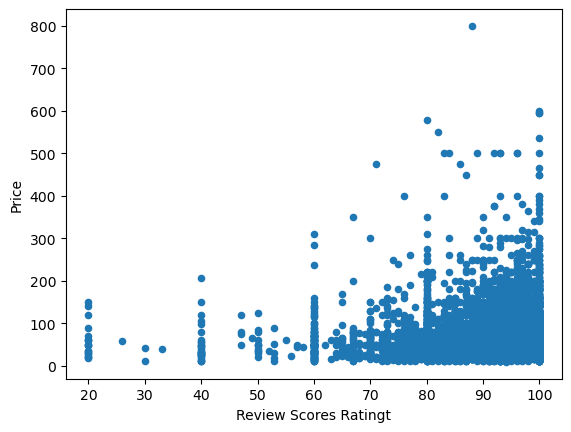

In [153]:
df_madrid.plot(kind = 'scatter',x='Review Scores Rating',y = 'Price')
plt.xlabel('Review Scores Ratingt')
plt.ylabel('Price')
plt.show()

In [154]:
df_madrid['Amenities_Count'].value_counts()

15    925
14    887
16    848
13    812
12    793
17    767
11    717
18    679
10    536
19    516
20    503
9     443
21    369
8     300
22    258
7     182
23    176
6     143
24    124
25     68
5      56
26     52
1      46
27     38
2      26
4      25
28     17
3      14
29      8
31      3
30      3
32      1
34      1
Name: Amenities_Count, dtype: int64

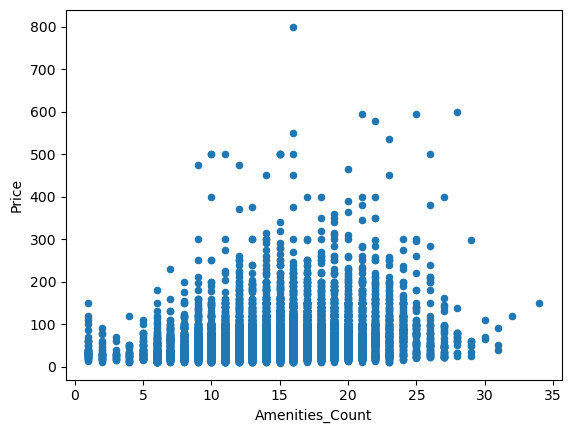

In [155]:
df_madrid.plot(kind = 'scatter',x='Amenities_Count',y = 'Price')
plt.xlabel('Amenities_Count')
plt.ylabel('Price')
plt.show()

## 5. Matriz de correlación

Después de limpiar y analizar las variables se calcula la matriz de correlación.

In [156]:
df_madrid.corr()

,Price,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Availability 90,Review Scores Rating,Amenities_Count
Price,1.000000,-0.065155,-0.047048,-0.509183,0.637995,0.519456,0.519456,0.519456,0.545331,-0.064034,0.058137,0.234341
Neighbourhood,-0.065155,1.000000,0.061476,0.130831,-0.074795,-0.012268,-0.012268,-0.012268,0.036684,0.081706,-0.033514,0.021805
Property Type,-0.047048,0.061476,1.000000,0.111953,-0.045023,-0.005983,-0.005983,-0.005983,-0.042822,0.055398,0.006235,0.029250
Room Type,-0.509183,0.130831,0.111953,1.000000,-0.474322,-0.247715,-0.247715,-0.247715,-0.259749,0.247699,0.004004,-0.202712
Accommodates,0.637995,-0.074795,-0.045023,-0.474322,1.000000,0.830918,0.830918,0.830918,0.354625,-0.083013,-0.060322,0.192363
Bathrooms,0.519456,-0.012268,-0.005983,-0.247715,0.830918,1.000000,1.000000,1.000000,0.317274,-0.027293,-0.052673,0.147561
Bedrooms,0.519456,-0.012268,-0.005983,-0.247715,0.830918,1.000000,1.000000,1.000000,0.317274,-0.027293,-0.052673,0.147561
Beds,0.519456,-0.012268,-0.005983,-0.247715,0.830918,1.000000,1.000000,1.000000,0.317274,-0.027293,-0.052673,0.147561
Cleaning Fee,0.545331,0.036684,-0.042822,-0.259749,0.354625,0.317274,0.317274,0.317274,1.000000,-0.041046,0.003437,0.127058
Availability 90,-0.064034,0.081706,0.055398,0.247699,-0.083013,-0.027293,-0.027293,-0.027293,-0.041046,1.000000,-0.084931,-0.054818


- 'Neighbourhood', 'Property Type', 'Room Type' y 'Availability 90' tienen una correlación negativa y baja respecto al precio, por lo que la influencia parece mímima para determinar el precio de la propiedad con los datos que se tienen. 
- 'Accommodates' tiene una correlación positiva moderada con el precio, indicando que las propiedades con mayor capacidad tienden a tener precios mas altos. Lo que puede resultar es que a mayor capacidad de personas a alojar, mayor el precio.
- 'Bathrooms', 'Bedrooms', 'Beds' y 'Cleaning Fee' tienen una correlación positiva alta respecto al precio por lo que a mayor cantidad de estas variables el precio es mas caro. 
-  'Review Scores Rating' tiene una correlación positiva muy baja con el precio, indicando que no influye de manera significativa en el precio. 
- 'Amenities_Count' tiene una correlación positiva moderada con el precio. Aquellas propiedades con mas comodidades pueden hacer incrementar ligeramente el precio. 

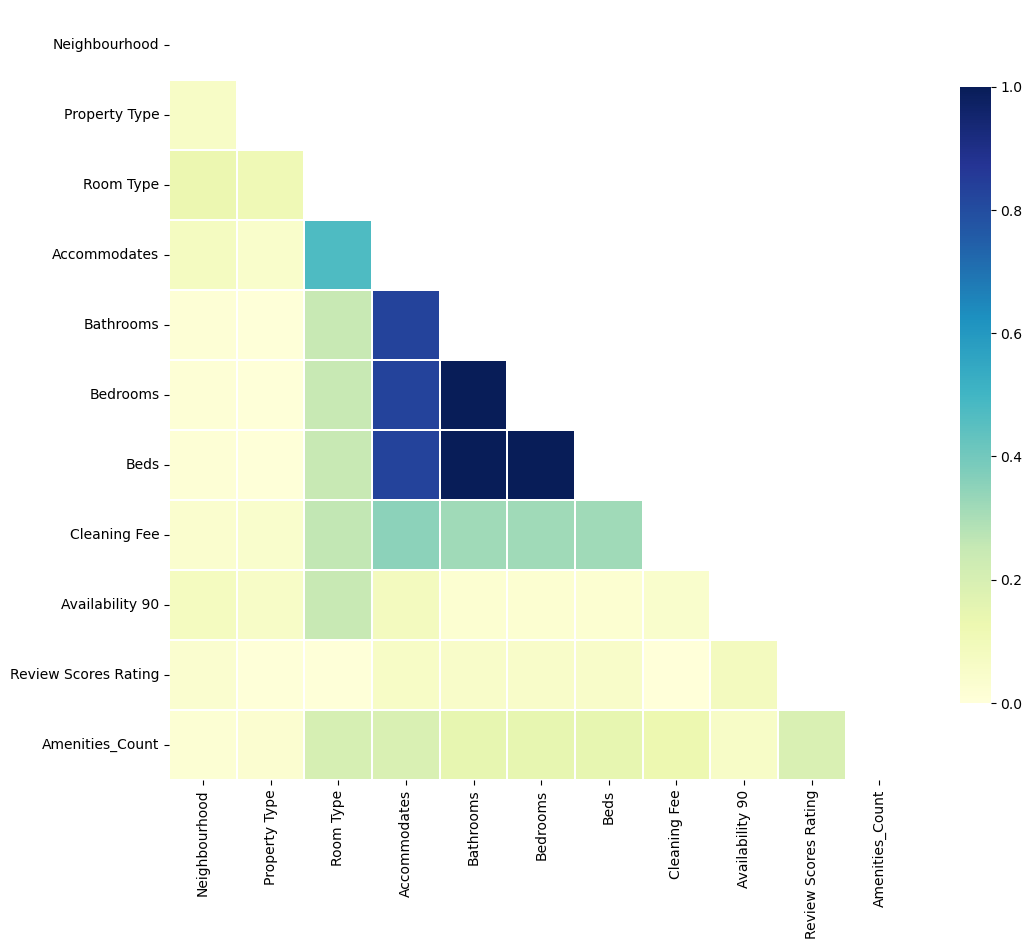

In [157]:
import seaborn as sns

corr = np.abs(df_madrid.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

## 6. División train/test

In [158]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data = df_madrid.values

y = data[:,0:1]
X = data[:,1:]

feature_names = df_madrid.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)


Datos entrenamiento:  (7752, 11)
Datos test:  (2584, 11)


## 7. Modelos

Regresión

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())

degrees = [1, 2, 3]

param_grid = {'polynomialfeatures__degree': degrees}

grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

best_degree = grid_search.best_params_['polynomialfeatures__degree']
print(f'Mejor grado: {best_degree}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s


[CV] END .......................polynomialfeatures__degree=2; total time=   0.2s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.6s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.1s
Mejor grado: 2


Nos da un resultado de mejor grado 2, aplicamos este dato a la Regresión. 

MSE train (grado 2): 936.255670015266
MSE test (grado 2): 880.7393432532887
RMSE train(grado 2): 30.598295214198878
RMSE test (grado 2): 29.677252960024596


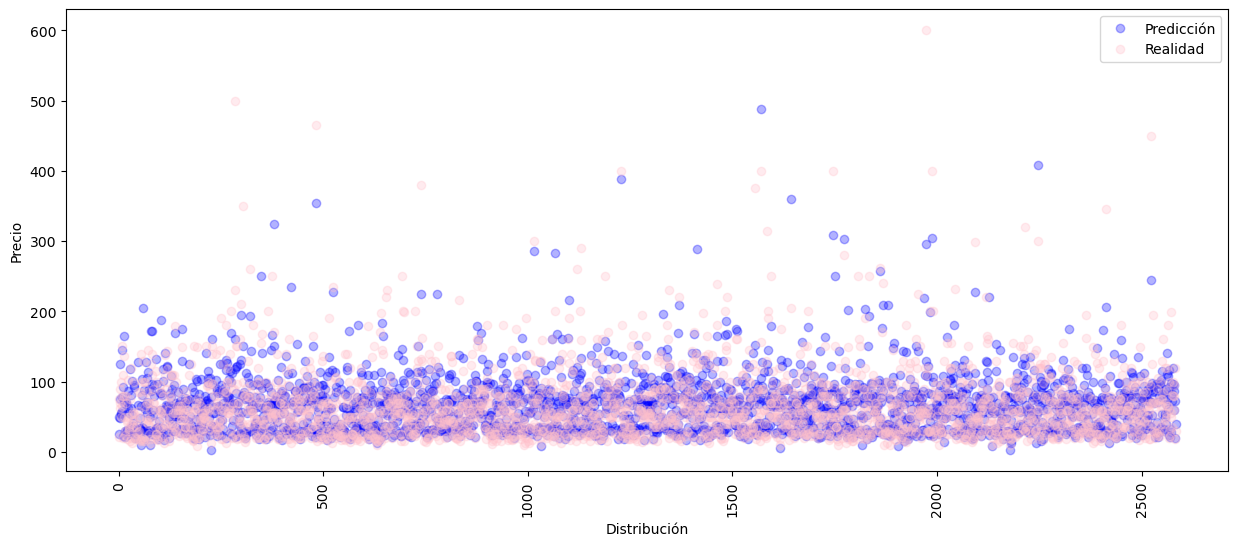

In [160]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialFeatures(degree=best_degree)

X_train_pr = poly_reg.fit_transform(X_train)
X_test_pr =poly_reg.fit_transform(X_test)
model = LinearRegression()

model.fit(X_train_pr, y_train)

y_pred_train = model.predict(X_train_pr)
y_pred_test = model.predict(X_test_pr)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f'MSE train (grado {best_degree}): {mse_train}')
print(f'MSE test (grado {best_degree}): {mse_test}')
print(f'RMSE train(grado {best_degree}): {rmse_train}')
print(f'RMSE test (grado {best_degree}): {rmse_test}')

plt.figure(figsize = (15, 6))
plt.plot(y_pred_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='blue',label='Predicción')
plt.plot(y_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='pink',label='Realidad')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución")
plt.legend()
plt.show()

Se calculan los residuos. 

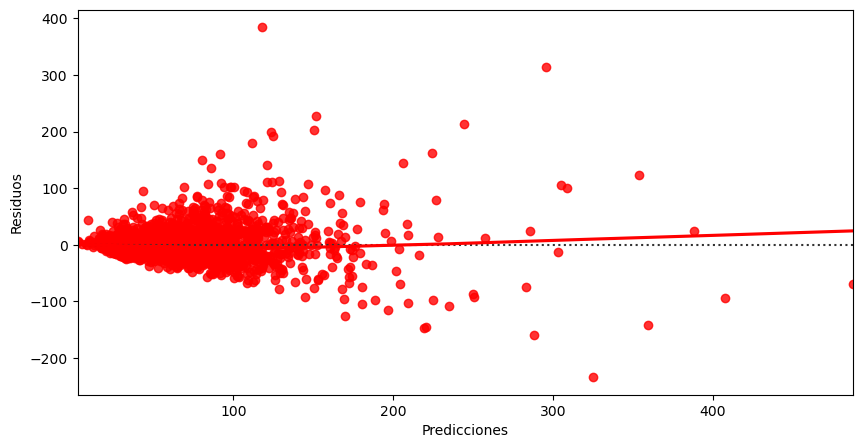

In [161]:
import seaborn as sns

residuals = y_test - y_pred_test

plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_test, y=residuals, lowess=True, color="red")
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END .......................................

KeyboardInterrupt: 

In [ ]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

y_train_RF = randomForest.predict(X_train)
y_test_RF  = randomForest.predict(X_test)

mseTrainModelRF = mean_squared_error(y_train,y_train_RF)
mseTestModelRF = mean_squared_error(y_test,y_test_RF)

print('MSE Modelo train Random Forest: %0.3g' % mseTrainModelRF)
print('MSE Modelo test Random Forest: %0.3g' % mseTestModelRF)

print('RMSE Modelo train Random Forest: %0.3g' % np.sqrt(mseTrainModelRF))
print('RMSE Modelo test Random Forest: %0.3g' % np.sqrt(mseTestModelRF))

Train:  0.8470237196302183
Test:  0.6673738465573165
MSE Modelo train Random Forest: 375
MSE Modelo test Random Forest: 809
RMSE Modelo train Random Forest: 19.4
RMSE Modelo test Random Forest: 28.4


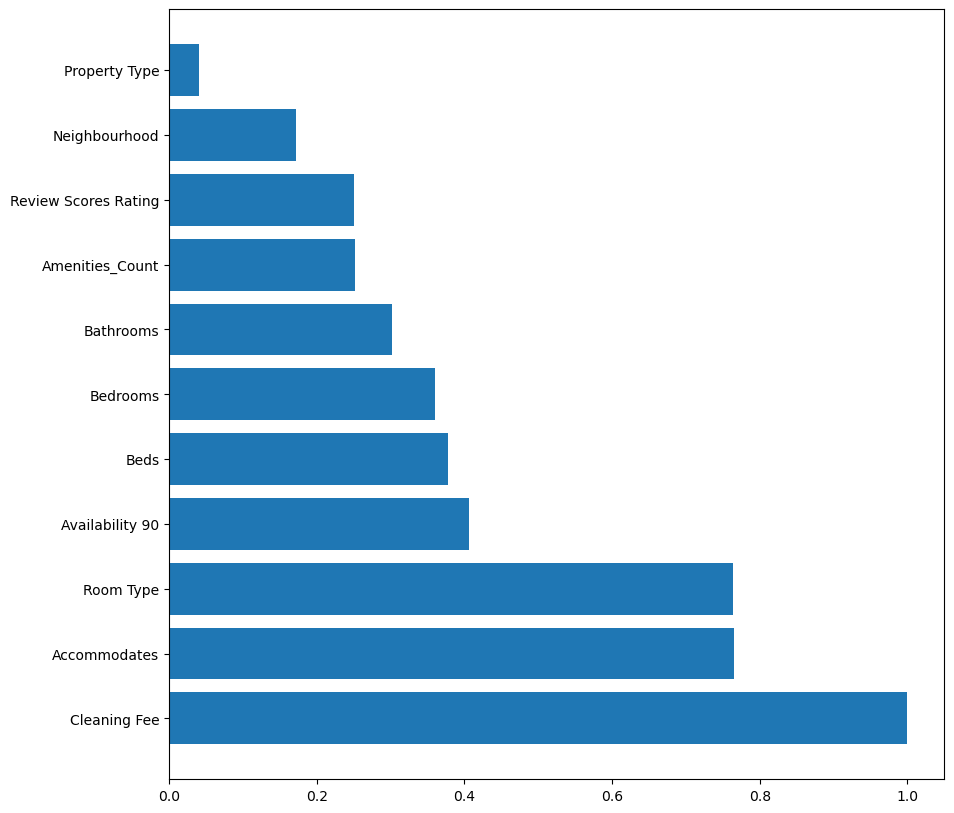

In [ ]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Bagging Regressor

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.2s
[CV] END ........................base_estimator__max_depth=1; total time=   0.2s
[CV] END ........................base_estimator__max_depth=1; total time=   0.2s
[CV] END ........................base_estimator__max_depth=1; total time=   0.2s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=3; total time=   0.5s
[CV] END ........................base_estimator_

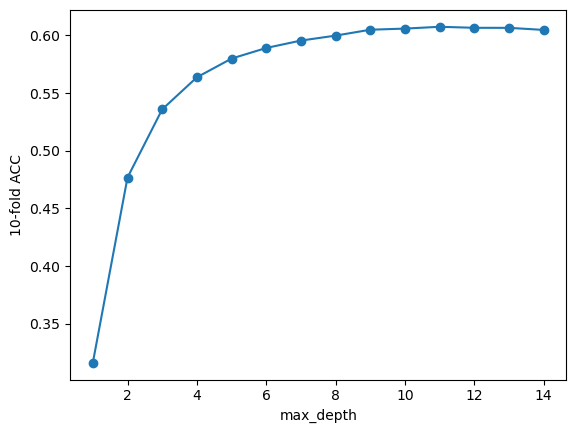

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [ ]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

y_train_BG = randomForest.predict(X_train)
y_test_BG  = randomForest.predict(X_test)

mseTrainModelBG = mean_squared_error(y_train,y_train_BG)
mseTestModelBG = mean_squared_error(y_test,y_test_BG)

print('MSE Modelo train Bagging: %0.3g' % mseTrainModelBG)
print('MSE Modelo test Bagging: %0.3g' % mseTestModelBG)

print('RMSE Modelo train Bagging: %0.3g' % np.sqrt(mseTrainModelBG))
print('RMSE Modelo test Bagging: %0.3g' % np.sqrt(mseTestModelBG))

Train:  0.8416317851929693
Test:  0.6723034444986578
MSE Modelo train Bagging: 375
MSE Modelo test Bagging: 809
RMSE Modelo train Bagging: 19.4
RMSE Modelo test Bagging: 28.4


Comparando los resultados de Random Forest y Bagging la diferencia no es significativa. No parece que haya signos evidentes de sobreajuste (overfitting) ni de subajuste (underfitting) ya que ambos están generalizando bien.